## A/B-тестирование
### Урок 9. Python применение продвинутых методов

Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.
Mobile Games AB Testing with Cookie Cats

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [18]:
df = pd.read_csv('cookie_cats.csv')

In [19]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [8]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [9]:
df.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [10]:
df.nlargest(5,['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1
7912,871500,gate_30,2961,1,1
29417,3271615,gate_40,2640,1,0
43671,4832608,gate_30,2438,1,1
48188,5346171,gate_40,2294,1,1


In [11]:
# Удалим выброс
df = df[df.sum_gamerounds < 3000]

df.describe()

In [13]:
# Расчитаем Выборки А и В:
A = df.version.groupby(df.version == 'gate_30').count()
B = df.version.groupby(df.version == 'gate_40').count()

In [14]:
print(A)

version
False    45489
True     44699
Name: version, dtype: int64


In [15]:
print(B)

version
False    44699
True     45489
Name: version, dtype: int64


Версия gate_30 - контрольная группа А,

Версия gate_40 - контрольная группа В

In [20]:
mannwhitneyu(df[df.version == 'gate_30'].sum_gamerounds,
             df[df.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

Pvalue практически равен 0.05, точнее, очень близок к 0.05, это значит то, что этого теста будет недостаточно для принятия решения, так как существует 5% вероятность того, что результат получен случайно.

In [22]:
ttest_ind(df[df.version == 'gate_30'].sum_gamerounds,
          df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.37290868247405207)

In [23]:
from scipy.stats import kstest
print(kstest(df['sum_gamerounds'][df.version == 'gate_30'], 'norm'))
print(kstest(df['sum_gamerounds'][df.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724176532867202, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.8707186187388001, pvalue=0.0, statistic_location=2, statistic_sign=-1)


Text(0.5, 1.0, 'Количество пользователей за первую неделю')

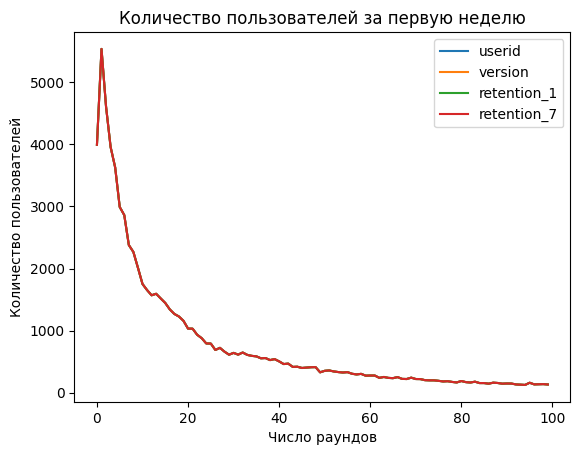

In [24]:
plot_df = df.groupby('sum_gamerounds').count()

ax = plot_df[:100].plot()
ax.set_xlabel('Число раундов')
ax.set_ylabel('Количество пользователей')
ax.set_title('Количество пользователей за первую неделю')

Из графика видно, что большинство играет меньше 20-ти раундов

In [25]:
plt.style.use('ggplot')

Group_A = df[df.version == 'gate_30']
print(Group_A.head())

Group_B = df[df.version == 'gate_40']
print(Group_B.head())

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'],
                                              bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


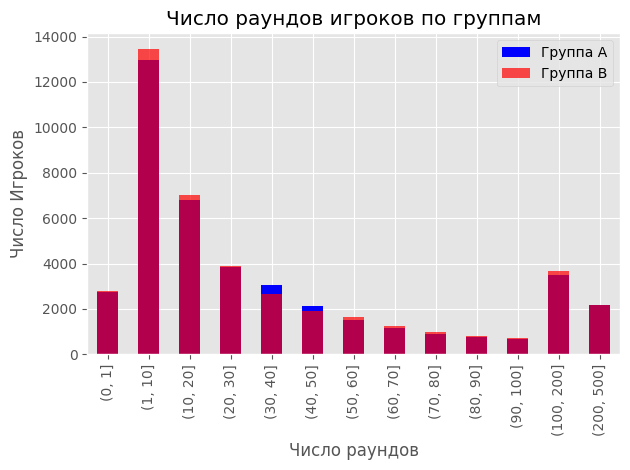

In [28]:
ax = plot_GA.plot(kind = 'bar', y='userid', color = 'blue', alpha = 1,
                  title = 'Число раундов игроков по группам')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'red', alpha = 0.7)
ax.set_xlabel('Число раундов')
ax.set_ylabel('Число Игроков')
plt.legend(['Группа А', 'Группа В'])
plt.tight_layout()
plt.grid(True)

Из графика видно, что между этими версиями практически нет разницы и небольшие различия заметны в пределах 30-40, 40-50 матчей

Рассмотрим удержание в течении одного дня:

In [29]:
oneday = df.retention_1.sum()/df.retention_1.count()
print(str(oneday*100)+'%')

44.52095044850259%


Удержание для групп:

In [30]:
oneday = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(oneday*100)

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


Для двух групп результат близок. Предполагаю, что изменения применять не стоит.

 Для принятия решения воспользуюсь Bootstrap методом:

In [31]:
boot_1d = []
for i in range(500):
  boot_mean = df.retention_1.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)

version       gate_30   gate_40
retention_1  0.450341  0.436209
retention_1  0.444906  0.440752
retention_1  0.450179  0.437435
retention_1  0.448311  0.444242
retention_1  0.450553  0.440506
...               ...       ...
retention_1  0.448388  0.444772
retention_1  0.447762  0.442744
retention_1  0.448120  0.441495
retention_1  0.446705  0.441867
retention_1  0.444968  0.442354

[500 rows x 2 columns]


Text(0.5, 0, 'Среднее время удержания в течении 1го дня')

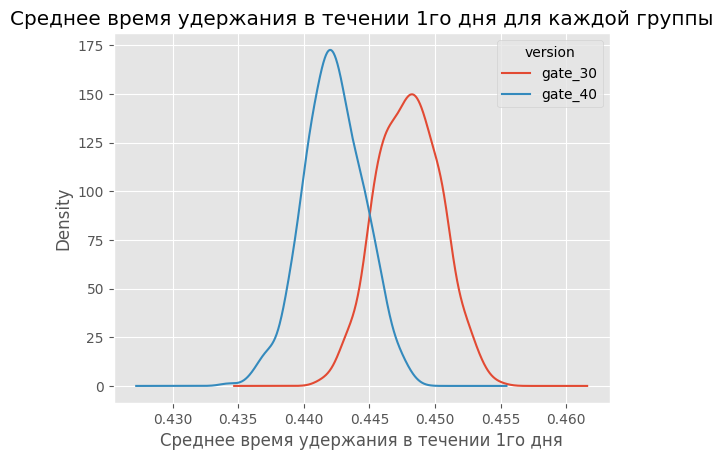

In [32]:
ax = boot_1d.plot.kde()
ax.set_title('Среднее время удержания в течении 1го дня для каждой группы')
ax.set_xlabel('Среднее время удержания в течении 1го дня')

Text(0.5, 1.0, 'Разница в процентах при масштабировании')

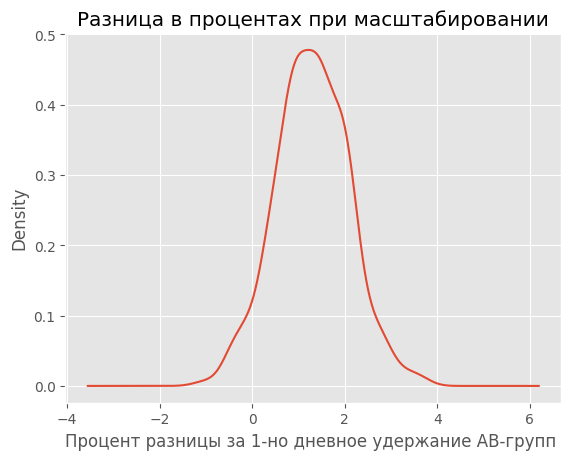

In [34]:
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100

ax = boot_1d['difference'].plot.kde()
ax.set_xlabel('Процент разницы за 1-но дневное удержание АВ-групп ')
ax.set_title('Разница в процентах при масштабировании')

Наиболее вероятная разница 1-2% в пользу ворот на 30 уровне.

In [35]:
prob = (boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+'%')

94.19999999999999%


В 94.2 % случаев разница больше 0. Высока вероятность того, что удержание в течении 1го дня лучше, когда ворота находятся на 30-м уровне.

Удержание в течении 7 дней для АВ групп:

In [36]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

 Процент удержания выше у gate_30

In [37]:
boot_7d = []
for i in range(500):
  boot_mean = df.retention_7.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.191750  0.182421
retention_7  0.191395  0.181032
retention_7  0.190950  0.183199
retention_7  0.189694  0.181056
retention_7  0.189164  0.184325


1.0


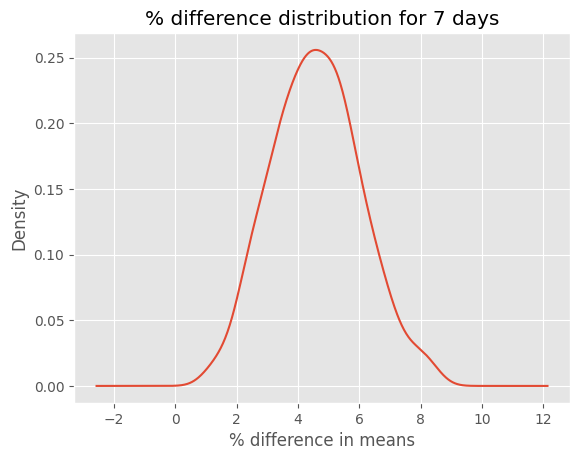

In [38]:
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% difference in means')
ax.set_title('% difference distribution for 7 days')

prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

print(prob)

In [39]:
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob*100)+'%')

100.0%


Исследования показали, что и в случае 7 дней удержание выше, когда ворота находятся на уровне 30. По результатам исследования не рекомендуем перемещать ворота.